In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'N225'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='1mo', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-18 00:00:00+09:00,39187.988281,39508.550781,39151.710938,39270.398438,116000000,0.0,0.0
2025-02-19 00:00:00+09:00,39230.621094,39298.050781,38994.699219,39164.609375,124300000,0.0,0.0
2025-02-20 00:00:00+09:00,38942.910156,38967.011719,38468.718750,38678.039062,125200000,0.0,0.0
2025-02-21 00:00:00+09:00,38523.070312,38808.808594,38456.531250,38776.941406,130100000,0.0,0.0
2025-02-25 00:00:00+09:00,38359.671875,38485.949219,38131.789062,38237.789062,132900000,0.0,0.0
2025-02-26 00:00:00+09:00,38143.679688,38175.238281,37742.761719,38142.371094,120800000,0.0,0.0
2025-02-27 00:00:00+09:00,38251.109375,38369.960938,38061.941406,38256.171875,121600000,0.0,0.0
2025-02-28 00:00:00+09:00,37853.480469,37925.281250,36840.121094,37155.500000,191600000,0.0,0.0
2025-03-03 00:00:00+09:00,37617.500000,37827.621094,37372.261719,37785.468750,115800000,0.0,0.0


In [3]:
#scaled_down_data = (daily/3000)-1.0
#mpf.plot(daily, figscale=0.7, fill_between=dict(y1=daily['Low'].values, y2=daily['High'].values))

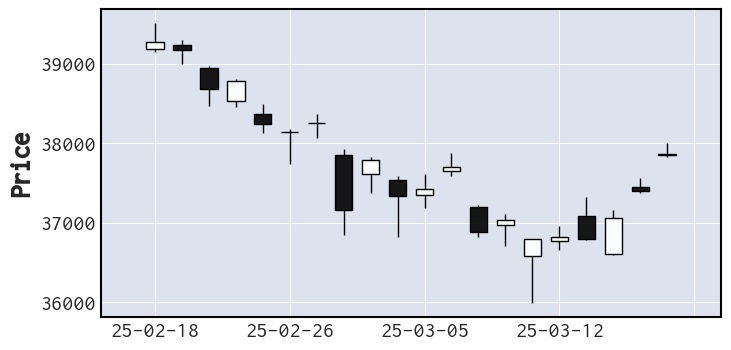

In [39]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(8, 4))
mpf.plot(
    df, type='candle', style='default',
    fill_between=[dict(y1=df['Low'].values, y2=df['High'].values, color='C0', alpha=0.25, ax=ax)],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)
#ax.fill_between(x=df.index, y1=df['Low'].values, y2=df['High'].values)

#ax.grid()
plt.savefig('test.png')
plt.show()